In [56]:
import gym
import numpy as np
import math
from collections import deque

import matplotlib.pyplot as plt
from IPython import display

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


env = gym.make('CartPole-v1')

buckets=(20, 20, 20, 20,)

Using TensorFlow backend.
/home/ukasz/Desktop/gym_tasks/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ukasz/Desktop/gym_tasks/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ukasz/Desktop/gym_tasks/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ukasz/Deskt

In [45]:
def get_parameters():
    episodes = 100000
    lr = 0.2
    discount = 1.0
    epsilon = 0.25
    Q = (np.zeros(buckets + (env.action_space.n,)))
    print(Q.shape)
    return Q, episodes, lr, discount, epsilon 
    

In [46]:
def discretize(obs):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)

In [47]:
def max_action(s, Q):
    return np.argmax(Q[s[0], s[1], s[2], s[3]])


def choose_action(s, eps, Q):
    if np.random.random() < eps:
        return np.random.randint(0, env.action_space.n)
    else:
        return max_action(s, Q)

In [48]:
def Q_learning():
    
    Q, episodes, lr, discount, eps = get_parameters()
    scores = deque(maxlen=100)
    history = []
    
    for e in range(episodes):
              
        s = env.reset()
        s = discretize(s)
        
        reward_sum = 0
        done = False
        while not done:
            
            if e >= episodes-3:
                env.render()          
            
            action = choose_action(s, eps, Q)
            
            s_next, reward, done, info = env.step(action)
            s_next = discretize(s_next)
            
            Q[s[0], s[1], s[2], s[3], action] += lr*(reward + discount*np.max(Q[s_next[0], s_next[1], s_next[2], s_next[3], :]) - Q[s[0], s[1], s[2], s[3], action])

            s = s_next
            reward_sum += reward

        scores.append(reward_sum)
            
        if e % 100 == 0:    
            mean = np.mean(scores)
            history.append(mean)
            print(e , ": ", mean)

        
    env.close()
    return history

(20, 20, 20, 20, 2)
0 :  12.0
100 :  14.43
200 :  15.49
300 :  14.66
400 :  14.7
500 :  15.03
600 :  13.58
700 :  15.86
800 :  14.06
900 :  15.96
1000 :  18.71
1100 :  16.76
1200 :  17.11
1300 :  19.46
1400 :  18.94
1500 :  18.64
1600 :  21.98
1700 :  23.63
1800 :  25.93
1900 :  24.35
2000 :  26.76
2100 :  32.4
2200 :  32.94
2300 :  31.64
2400 :  35.09
2500 :  35.23
2600 :  35.87
2700 :  39.09
2800 :  40.73
2900 :  42.81
3000 :  42.95
3100 :  44.3
3200 :  39.18
3300 :  43.29
3400 :  49.21
3500 :  50.95
3600 :  55.21
3700 :  53.57
3800 :  56.94
3900 :  65.47
4000 :  66.11
4100 :  63.81
4200 :  69.12
4300 :  79.56
4400 :  66.26
4500 :  77.14
4600 :  77.26
4700 :  68.53
4800 :  77.1
4900 :  82.16
5000 :  86.32
5100 :  73.4
5200 :  105.46
5300 :  103.06
5400 :  95.68
5500 :  99.67
5600 :  101.17
5700 :  105.6
5800 :  131.38
5900 :  131.0
6000 :  142.55
6100 :  141.84
6200 :  129.07
6300 :  143.37
6400 :  147.55
6500 :  157.42
6600 :  156.01
6700 :  139.47
6800 :  134.72
6900 :  127.65
7000

52600 :  339.4
52700 :  286.07
52800 :  325.02
52900 :  364.04
53000 :  313.67
53100 :  367.15
53200 :  379.82
53300 :  353.78
53400 :  365.99
53500 :  356.87
53600 :  361.2
53700 :  342.8
53800 :  348.56
53900 :  301.72
54000 :  368.02
54100 :  346.98
54200 :  365.59
54300 :  341.64
54400 :  329.04
54500 :  307.38
54600 :  294.7
54700 :  320.08
54800 :  355.27
54900 :  347.98
55000 :  370.41
55100 :  347.58
55200 :  290.05
55300 :  322.72
55400 :  329.99
55500 :  352.89
55600 :  371.0
55700 :  396.47
55800 :  312.3
55900 :  339.51
56000 :  358.82
56100 :  319.4
56200 :  332.86
56300 :  292.71
56400 :  250.01
56500 :  300.51
56600 :  301.4
56700 :  323.77
56800 :  315.88
56900 :  244.6
57000 :  297.6
57100 :  293.3
57200 :  301.08
57300 :  362.4
57400 :  303.02
57500 :  354.72
57600 :  361.06
57700 :  307.54
57800 :  307.34
57900 :  351.58
58000 :  344.8
58100 :  372.26
58200 :  346.65
58300 :  311.73
58400 :  311.19
58500 :  262.97
58600 :  288.77
58700 :  237.24
58800 :  254.69
58900

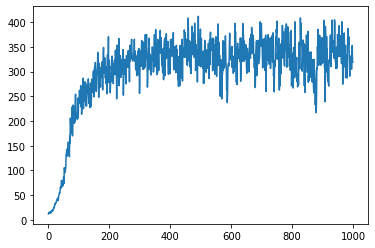

In [49]:
history = Q_learning()

plt.plot(history)
plt.show()

In [15]:
def sarsa():
    
    env, Q, episodes, lr, discount, eps = get_parameters()
    scores = deque(maxlen=100)
    history = []
    
    for e in range(episodes):
        
        s = env.reset()
        s = discretize(s)
        action = choose_action(s, eps, Q) 

        reward_sum = 0
        done = False
        while not done:
            
            if e >= episodes-3:
                env.render()
                
            s_next, reward, done, info = env.step(action)
            s_next = discretize(s_next)
            
            action_next = choose_action(s_next, eps, Q)

            Q[s[0], s[1], s[2], s[3], action] += lr*(reward + discount*Q[s_next[0], s_next[1], s_next[2], s_next[3], action_next] - Q[s[0], s[1], s[2], s[3], action])

            s = s_next
            action = action_next
            reward_sum += reward
        
        scores.append(reward_sum)
            
        if e % 100 == 0:    
            mean = np.mean(scores)
            history.append(mean)
            print(e , ": ", mean)

            
    env.close()
    return history

(20, 20, 20, 20, 2)
0 :  9.0
100 :  14.22
200 :  13.19
300 :  13.3
400 :  13.6
500 :  13.75
600 :  13.5
700 :  14.53
800 :  14.33
900 :  14.02
1000 :  14.4
1100 :  15.0
1200 :  15.96
1300 :  15.09
1400 :  14.28
1500 :  14.96
1600 :  15.38
1700 :  16.68
1800 :  17.03
1900 :  17.24
2000 :  17.88
2100 :  19.6
2200 :  20.74
2300 :  24.01
2400 :  24.93
2500 :  21.24
2600 :  23.94
2700 :  24.38
2800 :  26.85
2900 :  28.21
3000 :  28.76
3100 :  29.26
3200 :  36.26
3300 :  30.93
3400 :  35.83
3500 :  37.26
3600 :  40.44
3700 :  41.22
3800 :  42.88
3900 :  38.71
4000 :  37.03
4100 :  41.39
4200 :  43.35
4300 :  47.43
4400 :  44.55
4500 :  41.79
4600 :  50.08
4700 :  43.51
4800 :  44.99
4900 :  47.04
5000 :  46.91
5100 :  48.79
5200 :  51.14
5300 :  54.36
5400 :  52.91
5500 :  65.27
5600 :  58.28
5700 :  69.93
5800 :  77.84
5900 :  82.59
6000 :  68.73
6100 :  77.47
6200 :  87.23
6300 :  97.3
6400 :  86.8
6500 :  84.31
6600 :  85.85
6700 :  113.19
6800 :  103.22
6900 :  107.98
7000 :  106.94
7100

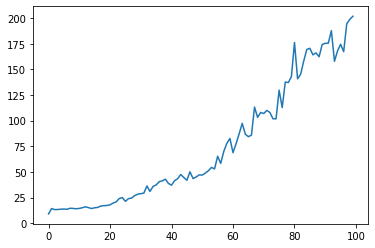

In [16]:
history = sarsa()

plt.plot(history)
plt.show()

In [158]:
class DQN:
    
    def __init__(self):
        self.env = gym.make('CartPole-v1')
        
        self.LEARNING_RATE = 0.01
        self.MEMORY_SIZE = 1000
        self.EPSILON = 0.2
        self.EPISODES = 300
        self.BATCH_SIZE = 256
        self.GAMMA = 1.0
        
        self.observation_space = self.env.observation_space.shape
        self.action_space = self.env.action_space.n
        
        self.memory = deque(maxlen=self.MEMORY_SIZE)
        self.model = self.build_model()


    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_shape=self.observation_space, activation="relu"))
        model.add(Dense(24, activation="relu"))
        model.add(Dense(self.action_space, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(lr=self.LEARNING_RATE))
        return model
    
    def remember(self, experience):
        self.memory.append(experience)
        
    def choose_action(self, s):
        if np.random.random() < self.EPSILON:
             return self.env.action_space.sample()
        else:
            q_values = self.model.predict(s)
            return np.argmax(q_values)

    def reshape_state(self, s):
        return np.array(s).reshape((1, 4))
    
    def experience_replay(self, s)
        if len(self.memory) < self.BATCH_SIZE:
            return
        for s, a, r, s_new in self.memory:
            q = r + self.GAMMA * s_new
    
    def train(self):
        s = env.reset()
        s = self.reshape_state(s)
        for e in range(self.EPISODES):
            a = self.choose_action(s)
            s, reward, done, _ = env.step(a)
            s_new = self.reshape_state(s)
            
            s = s_new
            experience = (s, a, reward, s_new)
            self.remember(experience)
            


In [159]:
dqn = DQN()
dqn.train()